In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Het SVM probleem

Gegeven een linearly separable dataset, willen we het hypervlak vinden met maximale marge tussen beide klassen.

<img src="svm_hypotheses.png" alt="drawing" width="600"/>

- Hoe groter de marge tussen positief/negatief, hoe kleiner de kans op fouten bij nieuwe datapunten.
- Optimalisatie probleem: maximaliseer de marge zodanig dat datapunten aan de juiste kant van de lijn liggen.

## Kernel Trick

Gewogen som tussen twee vectoren $\mathbf{v}$ en $\mathbf{u}$ heet het **dot-product**: 
$$
    \mathbf{v} \cdot \mathbf{u} = \sum_{i=1}^d v_i u_i 
$$ 

- Dit wordt tijdens het trainen en in de beslisfunctie van SVM gebruikt om training instanties tegen elkaar op te wegen. 
- Hier kunnen we gebruik van maken als het probleem niet lineair separabel is. 

Merk op 
- gewogen som met $(d=2)$-dimensies geeft $1$ output waarde
- gewogen som met $(d=3)$-dimensies geeft $1$ output waarde
- gewogen som met $(d=4)$-dimensies geeft $1$ output waarde 
- gewogen som met $(d=\infty)$-dimensies geeft $1$ output waarde 

In [2]:
u = np.random.randn(10000,)
v = np.random.randn(10000,)

# numpy dot-product
u @ v, np.dot(u, v)

(115.46616947553036, 115.46616947553036)

- Stel $d=2$, en we hebben $N$ training instanties, i.e., paren $(x_1, x_2)$. 
- We nemen aan dat de data niet op een lineare manier kan worden opgedeeld.
- We kunnen de data transformeren door nieuwe dimensies te maken.
- Hierdoor is er meer "ruimte" in hogere dimensies om de data te separeren.

Bijvoorbeeld de volgende transformatie
$$
    \bm{\phi}(\mathbf{x}) = \begin{bmatrix} \phi_1(\mathbf{x})\\\phi_2(\mathbf{x})\\\phi_3(\mathbf{x})\\\phi_4(\mathbf{x})\\\phi_5(\mathbf{x})\\\phi_6(\mathbf{x}) \end{bmatrix} = \begin{bmatrix} 1\\\sqrt{2} x_1\\ \sqrt{2} x_2\\ \sqrt{2} x_1 x_2 \\ x_1^2 \\x_2^2 \end{bmatrix}
$$

In [3]:
X = np.array([
    [1, 1],
    [2, 3],
    [3, 4],
    [3, 2]
])

In [4]:
def phi(x1, x2):
    return np.array([
        1, 
        2**0.5 * x1, 
        2**0.5 * x2, 
        2**0.5 * x1 * x2, 
        x1**2,
        x2**2
    ])

Z = np.array([phi(x1, x2) for [x1, x2] in X])
Z, Z.shape

(array([[ 1.        ,  1.41421356,  1.41421356,  1.41421356,  1.        ,
          1.        ],
        [ 1.        ,  2.82842712,  4.24264069,  8.48528137,  4.        ,
          9.        ],
        [ 1.        ,  4.24264069,  5.65685425, 16.97056275,  9.        ,
         16.        ],
        [ 1.        ,  4.24264069,  2.82842712,  8.48528137,  9.        ,
          4.        ]]),
 (4, 6))

In [5]:
Z[0, :] @ Z[1, :]

36.0

Gegeven twee vectoren (instanties) $\mathbf{v}$ en $\mathbf{u}$ uit de bovenstaande dataset $\mathbf{X}$
\begin{align*}
    \phi(\mathbf{v}) \cdot \phi(\mathbf{u}) &= 1 + 2 v_1 u_1 + 2 v_2 u_2 + 2 v_1 v_2 u_1 u_2 + v_1^2 u_1^2 + v_2^2 u_2^2 \\ 
    &= (1 + v_1 u_1 + v_2 u_2)^2\\
    &= (1 + \mathbf{v} \cdot \mathbf{u})^2\\
    &= K(\mathbf{v}, \mathbf{u}) \qquad \text{Kernel trick! Polynomial kernel met graad 2}
\end{align*}

In [6]:
(X[0, :] @ X[1, :] + 1)**2

36

De truc is dus dat we de extra stap van de transformatie naar een hogere dimensie overslaan en direct het dot-product berekenen.

Dit is precies wat **kernel functies** doen, i.e., het kwantificeren van hoe vergelijkbaar twee instanties zijn. 

## Support Vector Machines

Andere benadering op een lineair model 
\begin{align*}
    f(\textbf{x}) &= \sum_i^d \textbf{w}_i \textbf{x}_i\\
    &= \textbf{w} \cdot \textbf{x}
\end{align*}

De vector $\textbf{w}$ representeert nu
$$
    \textbf{w} = \sum_{t=1}^N \alpha_t y_t \textbf{X}_t
$$
De $\alpha$ waarden zijn nu de gewichten van het model en moeten voldoen aan de voorwaaren:
- $\sum_t^N \alpha_t y_t = 0$
- $\alpha_t \geq 0, \forall t$ 

De $\textbf{X}_t$ datapunten waarvoor geldt dat $\alpha > 0$ zijn de **support vectors**

Als we $\textbf{w}$ uitschrijven in het linear model, dan valt je op
\begin{align*}
    f(\textbf{x}) &= \sum_{t=1}^N \alpha_t y_t \sum_i^d \textbf{X}_{ti} \textbf{x}_i\\
    &= \sum_{t=1}^N \alpha_t y_t \underbrace{\textbf{X}_{t} \cdot \textbf{x}}_{\text{dot}}
\end{align*}

Opmerkingen:
- Ook al zijn er $N$ waarden voor $\alpha$, de meeste verdwijnen omdat $\alpha_t = 0$
- Alleen de support vectoren blijven over (kleiner dan $N$ datapunten)
- We berekenen een dot product tussen vectoren op een lineaire manier
- Wat nou als we eerst een non-lineaire transformatie toepassen en dan een dot product
- **kernel trick**

\begin{align*}
    f(\textbf{x}) &= \sum_{t=1}^N \alpha_t y_t \sum_i^d \phi(\textbf{X}_{ti}) \phi(\textbf{x}_i)\\
    &= \sum_{t=1}^N \alpha_t y_t \phi(\textbf{X}_{t}) \cdot \phi(\textbf{x})\\
    &= \sum_{t=1}^N \alpha_t y_t K(\textbf{X}_{t}, \textbf{x})
\end{align*}

## Opdracht 1

#### Polynomial kernel

$$
    K(\mathbf{v}, \mathbf{u}) = \left((\sum_{i=1}^d v_i u_i) + b\right)^q
$$

met hyperparameters:
- $d$ is aantal dimensies van $\mathbf{v}$ en $\mathbf{u}$
- $b$ is de bias term
- $q$ is de graad van de polynomiaal

In [7]:
def K_poly(v: list, u: list, b: float, q: float):
    
    return (sum([vi * ui for vi, ui in zip(v, u)]) + b)**q
    # return (v @ u + b)**d

np.array([[K_poly(xi, xj, 1, 2) for xj in X] for xi in X])

array([[  9,  36,  64,  36],
       [ 36, 196, 361, 169],
       [ 64, 361, 676, 324],
       [ 36, 169, 324, 196]])

#### RBF kernel

$$
    K(\mathbf{v}, \mathbf{u}) = \exp\left( - \dfrac{\mathcal{D}(\mathbf{v}, \mathbf{u})}{2 \sigma^2} \right)
$$

met hyperparameter:
- $\sigma$ is de grootte van de radius
- $\mathcal{D}(\cdot, \cdot)$ is een afstandsfunctie. We kiezen nu voor de gekwadrateerde Euclidean distance (wortel valt door het kwadraat weg):

$$
    \mathcal{D}(\mathbf{v}, \mathbf{u}) = \sum_{i=1}^d (v_i - u_i)^2 
$$


In [8]:
def K_rbf(v: list, u: list, sigma: float):
    
    dist = sum([(vi - ui)**2 for vi, ui in zip(v, u)])
    return np.exp(-dist / (2 * sigma**2))
    # return np.exp(-np.linalg.norm(v-u)**2 / (2 * sigma**2))

np.array([[K_rbf(xi, xj, 1) for xj in X] for xi in X])

array([[1.        , 0.082085  , 0.00150344, 0.082085  ],
       [0.082085  , 1.        , 0.36787944, 0.36787944],
       [0.00150344, 0.36787944, 1.        , 0.13533528],
       [0.082085  , 0.36787944, 0.13533528, 1.        ]])

## Opdracht 2

<Axes: >

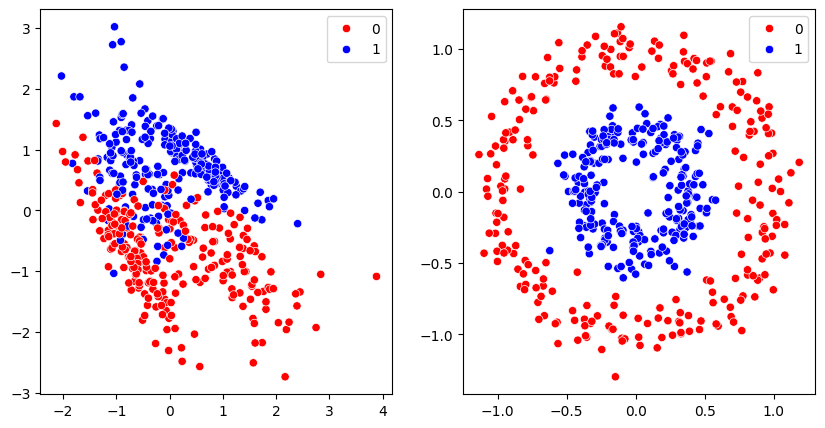

In [9]:
from sklearn.datasets import make_classification, make_circles

X1, y1 = make_classification(
    n_samples=500, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=2,
    n_clusters_per_class=2,
    class_sep=0.7,
    random_state=1
)

X2, y2 = make_circles(n_samples=500, noise=0.1, factor=.4, random_state=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(x=X1[:, 0], y=X1[:, 1], hue=y1, palette=['r', 'b'], ax=ax1)
sns.scatterplot(x=X2[:, 0], y=X2[:, 1], hue=y2, palette=['r', 'b'], ax=ax2)

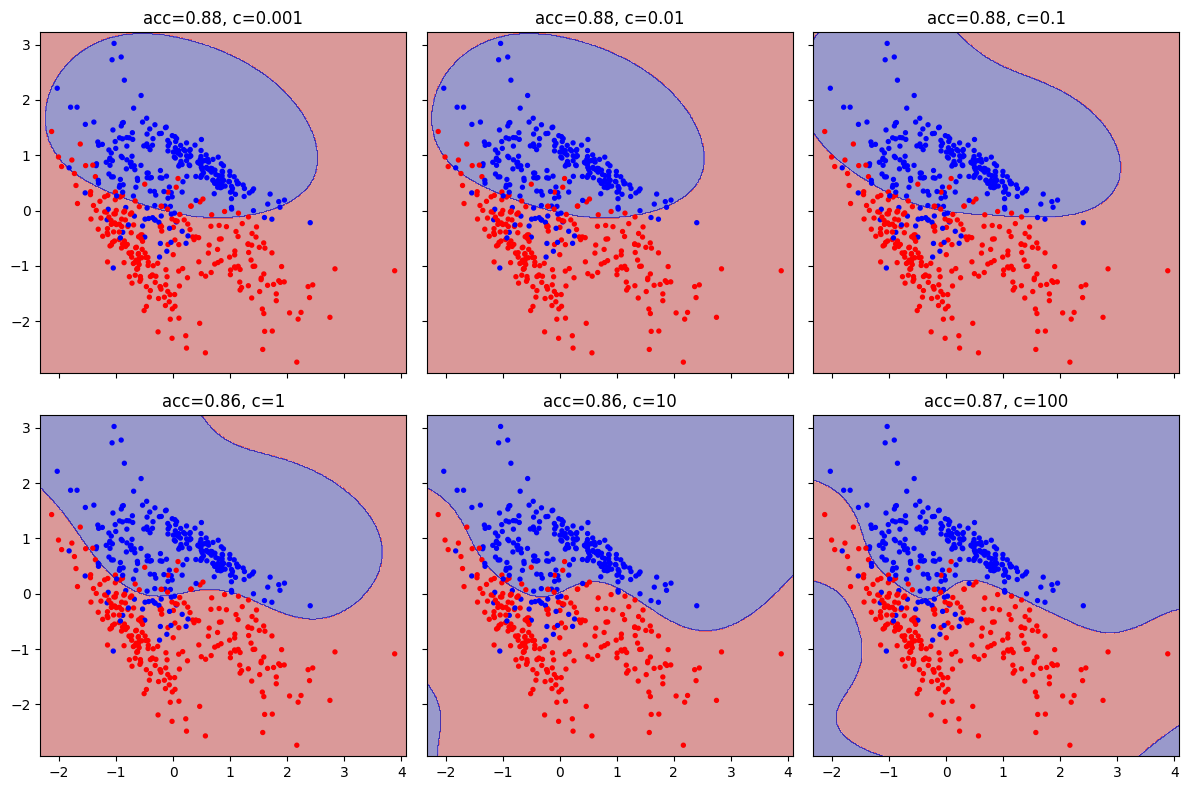

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'blue'])

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.2, stratify=y1)

fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

x_min, x_max = X1[:, 0].min() - 0.2, X1[:, 0].max() + 0.2
y_min, y_max = X1[:, 1].min() - 0.2, X1[:, 1].max() + 0.2
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 500),
                    np.linspace(y_min, y_max, 500))
D = np.vstack((XX.flatten(), YY.flatten())).T

C_params = [0.001, 0.01, 0.1, 1, 10, 100]

best_acc = 0
best_svm = None

for c, ax in zip(C_params, axes):

    svm = SVC(C=c).fit(X1_train, y1_train)

    acc = np.sum(svm.predict(X1_test) == y1_test)/y1_test.shape[0]
    if acc > best_acc:
        best_acc = acc
        best_svm = svm

    y_pred = svm.predict(D)
    y_pred = y_pred.reshape(XX.shape)
    ax.set_title(f"{acc=:.2f}, {c=}")
    ax.contourf(XX, YY, y_pred, alpha=.4, cmap='seismic_r')
    ax.scatter(X1[:, 0], X1[:, 1], c=y1, s=8, cmap=cmap)
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])

plt.tight_layout()


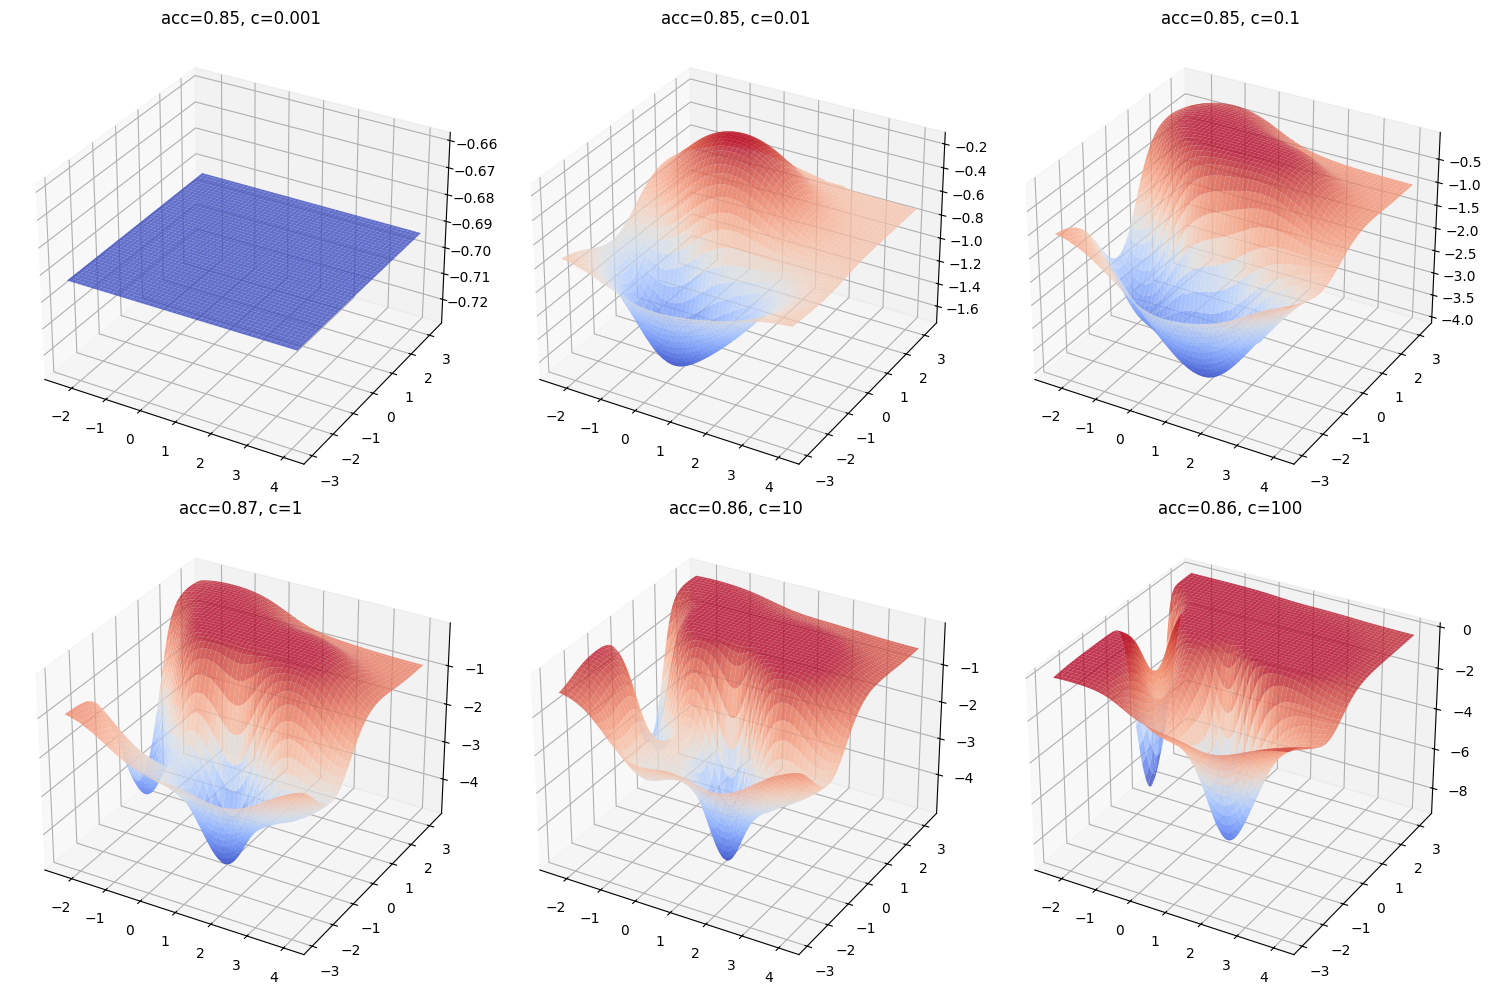

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'blue'])

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.2, stratify=y1)

fig = plt.figure(figsize=(15, 10))

x_min, x_max = X1[:, 0].min() - 0.2, X1[:, 0].max() + 0.2
y_min, y_max = X1[:, 1].min() - 0.2, X1[:, 1].max() + 0.2
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 200),
                    np.linspace(y_min, y_max, 200))
D = np.vstack((XX.flatten(), YY.flatten())).T

C_params = [0.001, 0.01, 0.1, 1, 10, 100]

best_acc = 0
best_svm = None

for i, c in enumerate(C_params):

    svm = SVC(C=c, probability=True).fit(X1_train, y1_train)
    acc = np.sum(svm.predict(X1_test) == y1_test)/y1_test.shape[0]
    if acc > best_acc:
        best_acc = acc
        best_svm = svm

    y_pred = svm.predict_log_proba(D)[:, 1]
    y_pred = y_pred.reshape(XX.shape)

    ax = fig.add_subplot(2, 3, i+1, projection='3d')

    ax.set_title(f"{acc=:.2f}, {c=}")
    ax.plot_surface(XX, YY, y_pred, cmap='coolwarm', alpha=0.8)
    # ax.set_xlim([x_min-1,x_max+1])
    # ax.set_ylim([y_min-1,y_max+1])

plt.tight_layout()

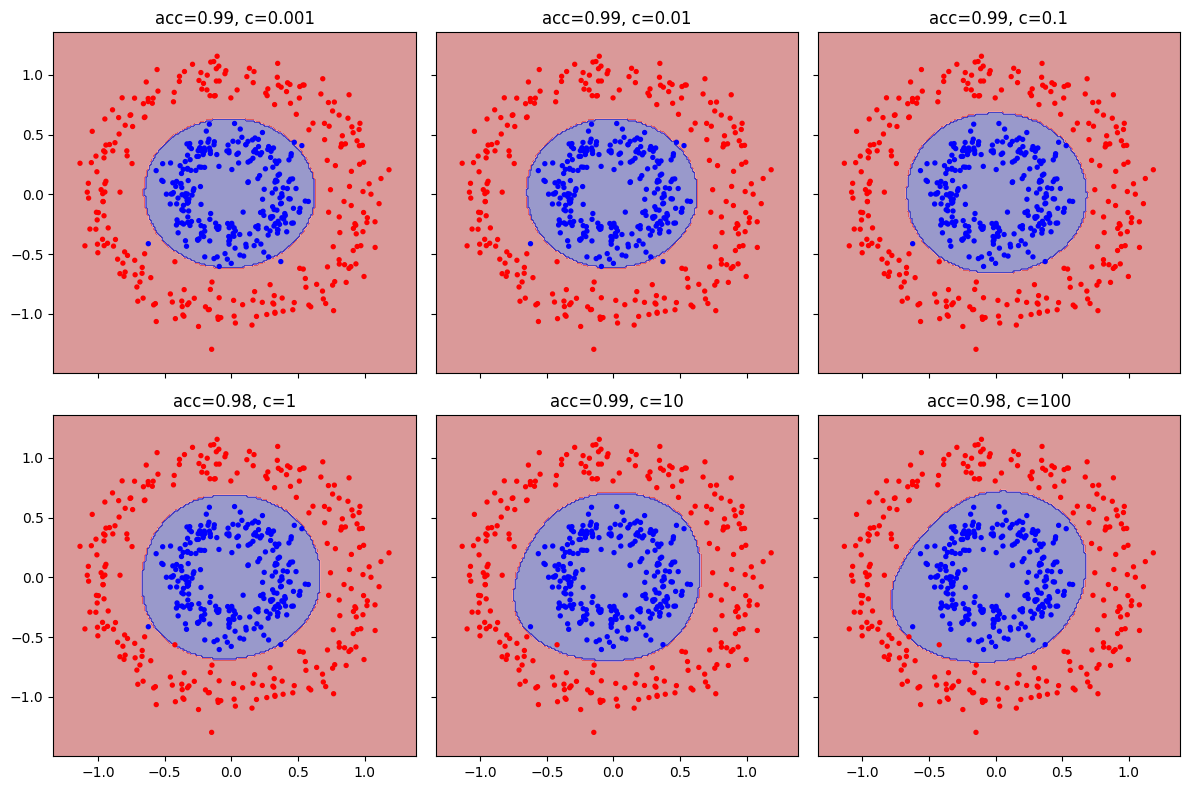

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'blue'])

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.2, stratify=y2)

fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

x_min, x_max = X2[:, 0].min() - 0.2, X2[:, 0].max() + 0.2
y_min, y_max = X2[:, 1].min() - 0.2, X2[:, 1].max() + 0.2
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 200),
                    np.linspace(y_min, y_max, 200))
D = np.vstack((XX.flatten(), YY.flatten())).T

C_params = [0.001, 0.01, 0.1, 1, 10, 100]

best_acc = 0
best_svm = None

for c, ax in zip(C_params, axes):

    svm = SVC(C=c).fit(X2_train, y2_train)

    acc = np.sum(svm.predict(X2_test) == y2_test)/y2_test.shape[0]
    if acc > best_acc:
        best_acc = acc
        best_svm = svm

    y_pred = svm.predict(D)
    y_pred = y_pred.reshape(XX.shape)
    ax.set_title(f"{acc=:.2f}, {c=}")
    ax.contourf(XX, YY, y_pred, alpha=.4, cmap='seismic_r')
    ax.scatter(X2[:, 0], X2[:, 1], c=y2, s=8, cmap=cmap)
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])

plt.tight_layout()


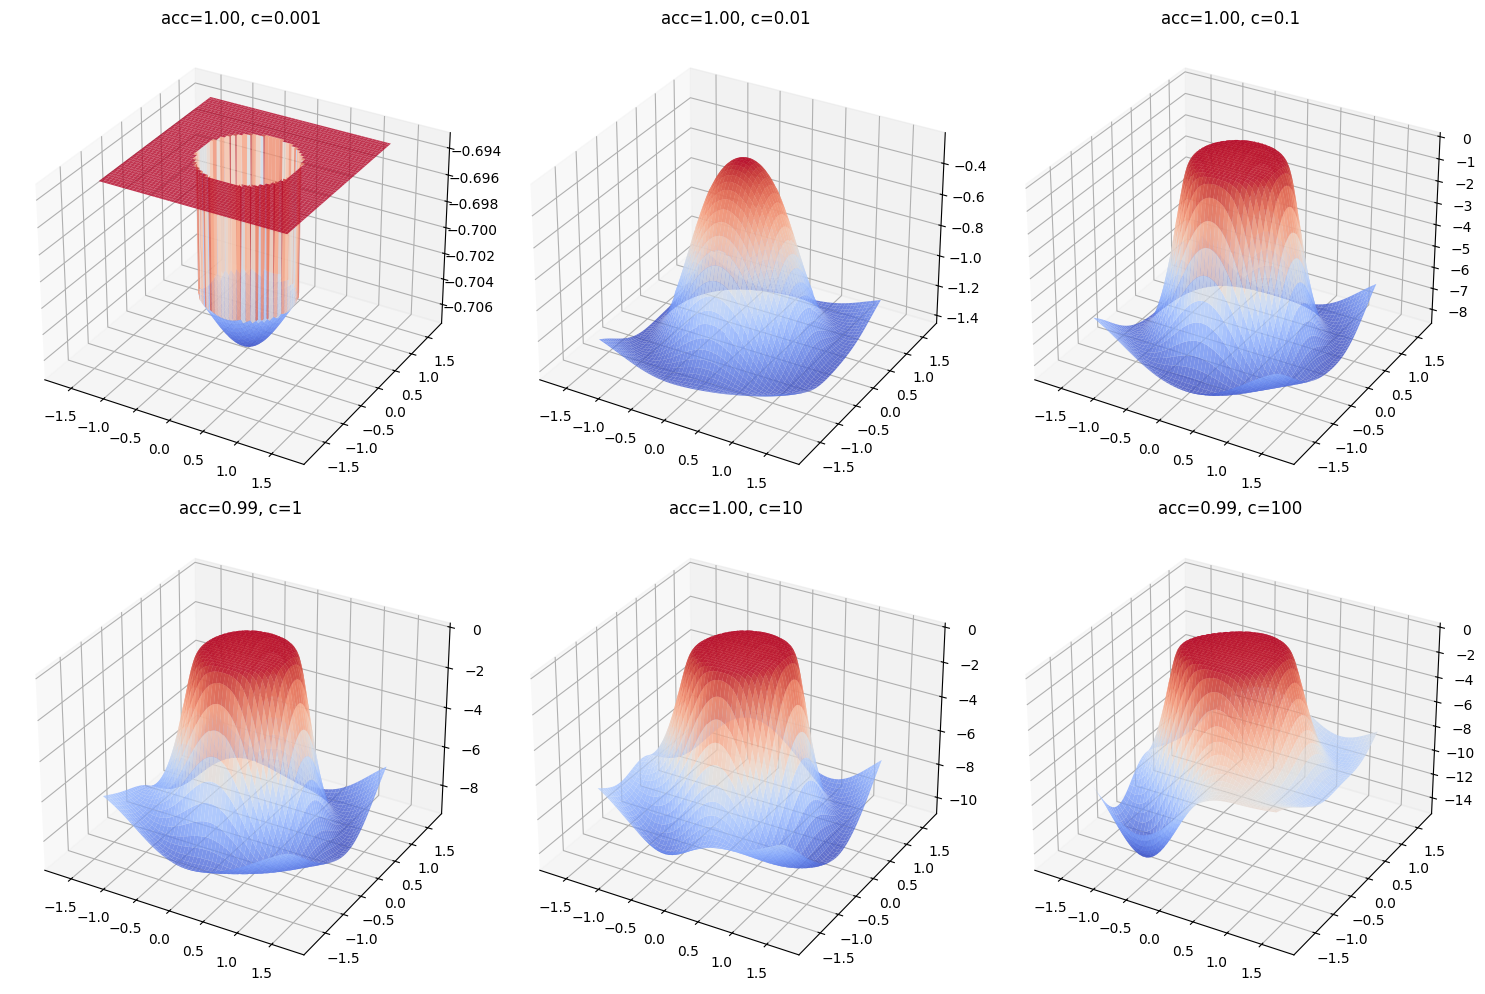

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'blue'])

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.2, stratify=y2)

fig = plt.figure(figsize=(15, 10))

x_min, x_max = X2[:, 0].min() - 0.2, X2[:, 0].max() + 0.2
y_min, y_max = X2[:, 1].min() - 0.2, X2[:, 1].max() + 0.2
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 200),
                    np.linspace(y_min, y_max, 200))
D = np.vstack((XX.flatten(), YY.flatten())).T

C_params = [0.001, 0.01, 0.1, 1, 10, 100]

best_acc = 0
best_svm = None

for i, c in enumerate(C_params):

    svm = SVC(C=c, probability=True).fit(X2_train, y2_train)
    acc = np.sum(svm.predict(X2_test) == y2_test)/y2_test.shape[0]
    if acc > best_acc:
        best_acc = acc
        best_svm = svm

    y_pred = svm.predict_log_proba(D)[:, 1]
    y_pred = y_pred.reshape(XX.shape)

    ax = fig.add_subplot(2, 3, i+1, projection='3d')

    ax.set_title(f"{acc=:.2f}, {c=}")
    ax.plot_surface(XX, YY, y_pred, cmap='coolwarm', alpha=0.8)
    ax.set_xlim([x_min-0.5,x_max+.5])
    ax.set_ylim([y_min-0.5,y_max+.5])

plt.tight_layout()


## Optioneel/extra

SVM playground tool: https://fbeilstein.github.io/simplest_smo_ever/

SVM implementatie:
- maakt gebruik van het Sequential Minimization Optimization (SMO) algoritme
- voor de geinteresseerde, link naar de paper: https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr-98-14.pdf
- de paper stelt een vrij simpel en snel algoritme voor om SVM te implementeren
- onderstaande code is bijna direct afleidbaar uit de pseudocode van de paper

In [14]:
class SVM:
    def __init__(self, C=1, epsilon=1e-4, max_iter=10, kernel='rbf', sigma=1, poly_d=2, poly_c=1):
        self.C = C
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.kernel = kernel
        self.sigma = sigma # only relevant for rbf kernel
        self.poly_c = poly_c # regularisation only relevant for polynomial kernel
        self.poly_d = poly_d # only relevant for polynomial kernel
        self.init_params()
    
    def init_params(self):
        self.X = None
        self.y = None
        self.alphas = None
        self.w0 = 0

    def K(self, a, b):
        # if a has shape (d, ), change to (1, d), i.e., a^T
        if len(a.shape) <= 1: 
            a = a[None, ...]

        # if b is vec, this is just dot(a, b), if b is matrix (N, d), its transpose gives all dot products
        if self.kernel == 'linear':
            return a @ b.T
        elif self.kernel == 'poly':
            return (a @ b.T + self.poly_c)**self.poly_d
        elif self.kernel == 'rbf':
            # if b is vec (d, ), change to (1, d), i.e., b^T
            if len(b.shape) <= 1: 
                b = b[None, ...]
            # add new axis to b which yields (1, d, 1), transpose last two axes, which yields (1, 1, d)
            # if a is matrix with shape (N, d), then this broadcasts (N, d) - (1, 1, d) = (1, N, d)
            # if a is vec with shape (1, d), then this broadcasts (1, d) - (1, 1, d) = (1, 1, d)
            # norm is computed on axis 2, which results in (1, N), and transpose is returned which is (N, 1)
            return np.exp(-np.linalg.norm(a - np.transpose(b[..., None], axes=(0, 2, 1)), axis=2)**2 / (2 * self.sigma**2)).T
        
    def g(self, x):
        # w = sum_t a^t y^t x^t, thus, w^T x + w0 = sum_t a^t y^t (x^t)^T x + w0, where (x^t)^T x is linear kernel
        return (self.alphas * self.y) @ self.K(self.X, x) + self.w0

    def fit(self, X, y):
        N = y.shape[0]
        self.X = X
        self.y = y
        self.alphas = np.zeros(N)
        self.w0 = 0
        
        iter = 0
        while iter < self.max_iter:
            alphas_changed = 0

            for i in range(N):

                E_i = self.g(X[i]) - y[i]
                # KKT conditions check
                if (E_i * y[i] >= -self.epsilon or self.alphas[i] >= self.C) and \
                    (E_i * y[i] <= self.epsilon or self.alphas[i] <= 0): continue

                # choose random j, such that j != i
                j = np.random.randint(0, N)
                while j == i:
                    j = np.random.randint(0, N)

                # for convenience:
                a_i = self.alphas[i]; a_j = self.alphas[j]
                y_i = y[i]; y_j = y[j]
                x_i = X[i]; x_j = X[j]

                # lower-upper bound
                if y_i != y_j:
                    L = max(0, a_j - a_i)
                    H = min(self.C, self.C + a_j - a_i)
                else:
                    L = max(0, a_j + a_i - self.C)
                    H = min(self.C, a_j + a_i)
                
                # check if lower and upper bound is equal
                if np.abs(L-H) < self.epsilon: continue

                # error between svm output and y
                E_i = self.g(x_i) - y_i
                E_j = self.g(x_j) - y_j

                # if eta is not negative, we continue
                eta = -self.K(x_i, x_i) - self.K(x_j, x_j) + 2 * self.K(x_i, x_j)
                if eta >= 0: continue

                # compute new a_j and clip it against [L, H] bounds
                a_jn = a_j - y_j * (E_i - E_j)/eta
                a_jn = H if a_jn > H else L if a_jn < L else a_jn

                # if new a_j is same as old a_j, then continue
                if np.abs(a_j - a_jn) < self.epsilon: continue

                # compute new a_i
                s = y_i * y_j
                a_in = a_i + s * (a_j - a_jn)

                # compute new w0
                b_i = self.w0 - E_i - y_i * (a_in - a_i) * self.K(x_i, x_i) - y_j * (a_jn - a_j) * self.K(x_i, x_j)
                b_j = self.w0 - E_j - y_i * (a_in - a_i) * self.K(x_i, x_j) - y_j * (a_jn - a_j) * self.K(x_j, x_j)
                self.w0 = b_i if 0 < a_in < self.C else \
                          b_j if 0 < a_jn < self.C else \
                         (b_i + b_j)/2
                
                self.alphas[i] = a_in
                self.alphas[j] = a_jn

                # values successfully updated
                alphas_changed += 1

            if alphas_changed == 0:
                iter += 1
            else:
                iter = 0
        
        support_vectors = self.alphas > 0
        self.X = self.X[support_vectors]
        self.y = self.y[support_vectors]
        self.alphas = self.alphas[support_vectors]

        return self

    def predict(self, X):
        return np.sign(self.g(X))


Testen op dataset

/tmp/ipykernel_51304/1063485279.py:107: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.alphas[i] = a_in
/tmp/ipykernel_51304/1063485279.py:108: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.alphas[j] = a_jn


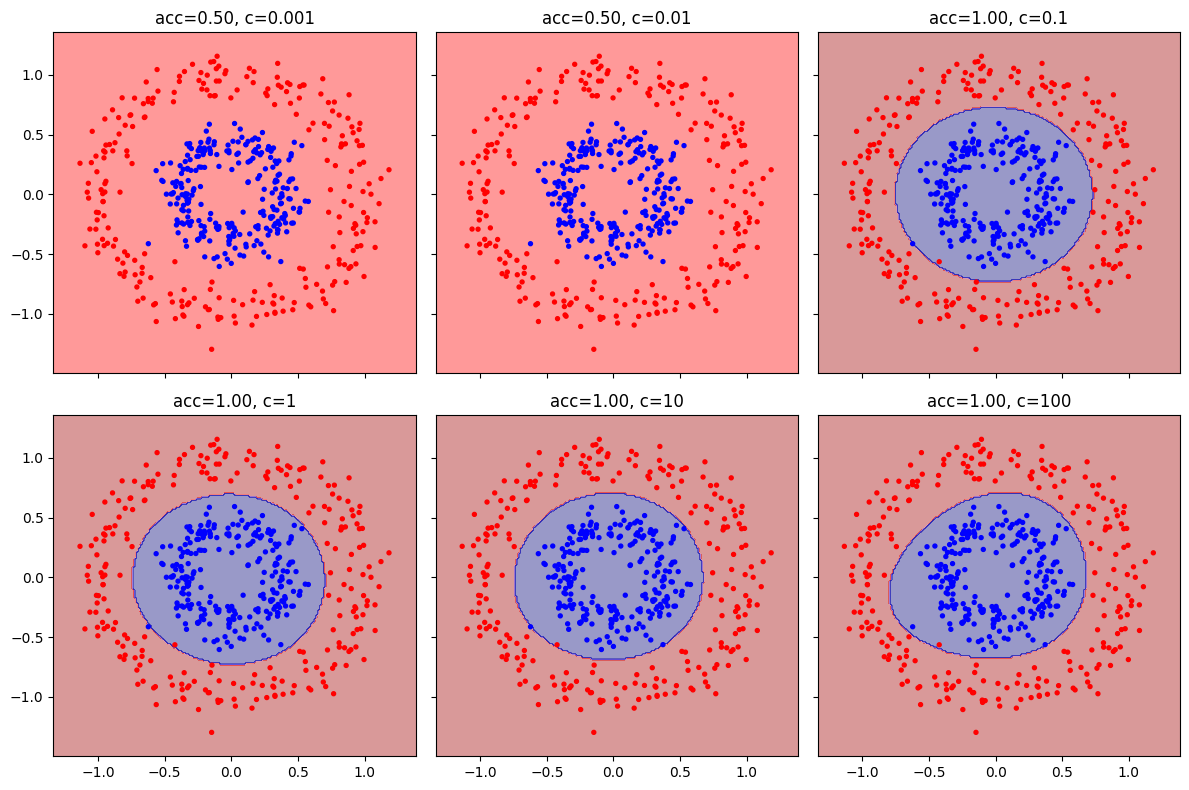

In [15]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'blue'])

# output preprocessing van [0, 1] naar [-1, 1]
y2_svm = y2*2 - 1
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2_svm, test_size=.2, stratify=y2)

fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

x_min, x_max = X2[:, 0].min() - 0.2, X2[:, 0].max() + 0.2
y_min, y_max = X2[:, 1].min() - 0.2, X2[:, 1].max() + 0.2
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 200),
                    np.linspace(y_min, y_max, 200))
D = np.vstack((XX.flatten(), YY.flatten())).T

C_params = [0.001, 0.01, 0.1, 1, 10, 100]

best_acc = 0
best_svm = None

for c, ax in zip(C_params, axes):

    svm = SVM(C=c, max_iter=10).fit(X2_train, y2_train)

    acc = np.sum(svm.predict(X2_test) == y2_test)/y2_test.shape[0]
    if acc > best_acc:
        best_acc = acc
        best_svm = svm

    y_pred = svm.predict(D)
    y_pred = y_pred.reshape(XX.shape)
    ax.set_title(f"{acc=:.2f}, {c=}")
    ax.contourf(XX, YY, y_pred, alpha=.4, cmap='seismic_r')
    ax.scatter(X2[:, 0], X2[:, 1], c=y2, s=8, cmap=cmap)
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])

plt.tight_layout()
